### Ruptures Package

In [5]:
#Import the data needed
import pandas as pd

df = pd.read_csv('data/sample_data/m_1939.csv')
df.head()

,date,machine_id,mem_util_percent,label
0,2018-01-01 00:00:00,m_1939,89.000000,Anomaly
1,2018-01-01 00:05:00,m_1939,92.500000,Anomaly
2,2018-01-01 00:10:00,m_1939,91.000000,Anomaly
3,2018-01-01 00:15:00,m_1939,92.000000,Anomaly
4,2018-01-01 00:20:00,m_1939,93.333333,Anomaly


In [6]:
#Convert value to datetime, set to be index
df['date'] = pd.to_datetime(df['date'])
df.set_index(df['date'], inplace = True)

#Timeseries info is set to mem_util_percent
ts = df['mem_util_percent']

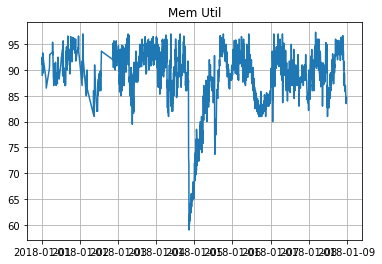

In [8]:
import matplotlib.pyplot as plt

plt.plot(ts)
plt.title('Mem Util')
plt.grid()
plt.show()

In [9]:
import numpy as np

y = np.array(ts.tolist())



In [10]:
import ruptures as rpt

n_breaks = 3

model = rpt.Dynp(model="l1")
model.fit(y)
breaks = model.predict(n_bkps=n_breaks-1)

In [11]:
breaks_rpt = []
for i in breaks:
    breaks_rpt.append(ts.index[i-1])
breaks_rpt = pd.to_datetime(breaks_rpt)
breaks_rpt

DatetimeIndex(['2018-01-04 20:25:00', '2018-01-05 05:30:00',
               '2018-01-08 23:55:00'],
              dtype='datetime64[ns]', freq=None)

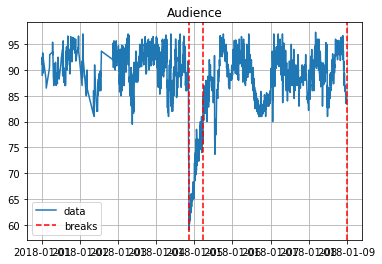

In [12]:
plt.plot(ts, label='data')
plt.title('Audience')
print_legend = True
for i in breaks_rpt:
    if print_legend:
        plt.axvline(i, color='red',linestyle='dashed', label='breaks')
        print_legend = False
    else:
        plt.axvline(i, color='red',linestyle='dashed')
plt.grid()
plt.legend()
plt.show()

Notes:

Change Point Detection
- Online Method: Detect changes in real-time (Event / Anomaly Detection)
- Offline Methods: Detect changes after all samples have been received (Signal Segmentation)



Time Series Modeling
- Univariate: Series with a single-time dependent variable. Ex: Time / Temperature
- Multivariate: Consists of more than one time-dependent variable and each variable depends not only on its past values but also has some dependency on other variables. Ex: Time, Temp / Cloud Cover / Dew Point / Humidity / Wind


# Jenkspy (Fisher-Jenks Algorithm)

This method is also known as Jenks Natural Breaks (1977, Jenks), it determines optimal class boundaries. Like K-means it assigns data to one of the K groups, with best minimized. Have to select K before running the algorithm. Relies on the concept of Natural Breaks, which is the best way to split of ranges, tries to group like ranges together, and minimizes the variation.

Pros: Good for one-dimensional data.
Cons: Have to specify the number of clusters.

Algorithm: 

1. Calculate sum of squared deviations for array mean
2.
3.


Additional Information Resources:
- https://en.wikipedia.org/wiki/Jenks_natural_breaks_optimization
- (Plugin) https://pypi.org/project/jenkspy/ | https://github.com/mthh/jenkspy 
- (Tutorial) https://pbpython.com/natural-breaks.html

References:
- Optimal Data Classification for Choropleth Maps, George F. Jenks, 1977